In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#csv 파일 읽기
df = pd.read_csv("Covid Data.csv")
df['died'] = df['DATE_DIED'] != '9999-99-99'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [11]:
# USER = 1차 진료 기관 여부 1 = YES 2= NO
#medical_unit	진료받은 의료 기관 코드	병원 종류나 지역
#sex	성별	1=남자, 2=여자
#patient_type	외래 vs 입원 여부	1=외래, 2=입원
#date_died	사망일	'9999-99-99'이면 아직 생존
#intubed	삽관 여부	1=Yes, 2=No, 97=알 수 없음
#pneumonia	폐렴 여부	1=Yes, 2=No
#age	나이	숫자
#pregnant	임신 여부 (여성만 해당)	1=Yes, 2=No
#diabetes	당뇨 여부	1=Yes, 2=No
#copd	만성폐쇄성폐질환 여부	1=Yes, 2=No
#asthma	천식 여부	1=Yes, 2=No
#inmsupr	면역억제 여부	1=Yes, 2=No
#hipertension	고혈압 여부	1=Yes, 2=No
#other_disease	기타 질환	1=Yes, 2=No
# cardiovascular	심혈관 질환	1=Yes, 2=No
#obesity	비만 여부	1=Yes, 2=No
#renal_chronic	만성 신장 질환	1=Yes, 2=No
#tobacco	흡연 여부	1=Yes, 2=No
#clasiffication_final	코로나 확진 여부	1=양성, 2=음성, 3=의심
#icu	중환자실 입실 여부	1=Yes, 2=No, 97=모름


In [12]:
# 전체 중 고혈압 환자
high_hpt=df[df['HIPERTENSION']==1]

#전체 중 고혈압 아닌 환자
no_hpt = df[df['HIPERTENSION']==2]

In [13]:
print(f"총 {len(high_hpt)}명 고혈압 환자 데이터")

총 162729명 고혈압 환자 데이터


In [20]:
hpt_count=round(len(high_hpt)/len(df)*100,3)
print(f"고혈압 환자 비율: {hpt_count}%")

고혈압 환자 비율: 15.519%


In [21]:
#고혈압 중 사망자
dead_high_hpt=df[(df['HIPERTENSION'] == 1) & (df['DATE_DIED'] != '9999-99-99')]
print(f"{len(dead_high_hpt)}명")

32061명


In [22]:
# 고혈압 없는 사람 중 사망자
dead_no_hpt=df[(df['HIPERTENSION'] == 2) & (df['DATE_DIED'] != '9999-99-99')]
print(f"{len(dead_no_hpt)}명")

44191명


In [23]:
death_rate_high = round(len(dead_high_hpt)/len(high_hpt)*100,3)
death_rate_no = round(len(dead_no_hpt)/len(no_hpt)*100,3)

In [24]:
print(f"고혈압 환자 사망률 : {death_rate_high}")
print(f"고혈압 없는 환자 사망률 : {death_rate_no}")

고혈압 환자 사망률 : 19.702
고혈압 없는 환자 사망률 : 5.006


코로나 확진자 분석

In [25]:
#기저 질환이 코로나 사망률에 끼치는 영향

In [26]:
# 코로나 확진자
cvd = df[df['CLASIFFICATION_FINAL'] ==1]

In [27]:
# 코로나 확진자 사망자
dead_cvd = cvd[cvd['DATE_DIED'] != '9999-99-99']

In [28]:
#기저 질환 리스트
disease_list = ['DIABETES','HIPERTENSION','OBESITY']
results = {}

In [29]:
for disease in disease_list :
    with_disease = cvd[cvd[disease]==1]
    without_disease = cvd[cvd[disease]==2]
    
    death_rate_with = round(with_disease['died'].mean()*100,3)
    death_rate_without = round(without_disease['died'].mean()*100,3)
    
    results[disease] = {
        'with': death_rate_with,
        'without': death_rate_without
    }

for disease, rates in results.items():
    print(f"{disease.capitalize()}:")
    print(f"  * With    : {rates['with']}%")
    print(f"  * Without : {rates['without']}%\n")


Diabetes:
  * With    : 30.885%
  * Without : 7.695%

Hipertension:
  * With    : 25.768%
  * Without : 7.942%

Obesity:
  * With    : 14.687%
  * Without : 10.142%



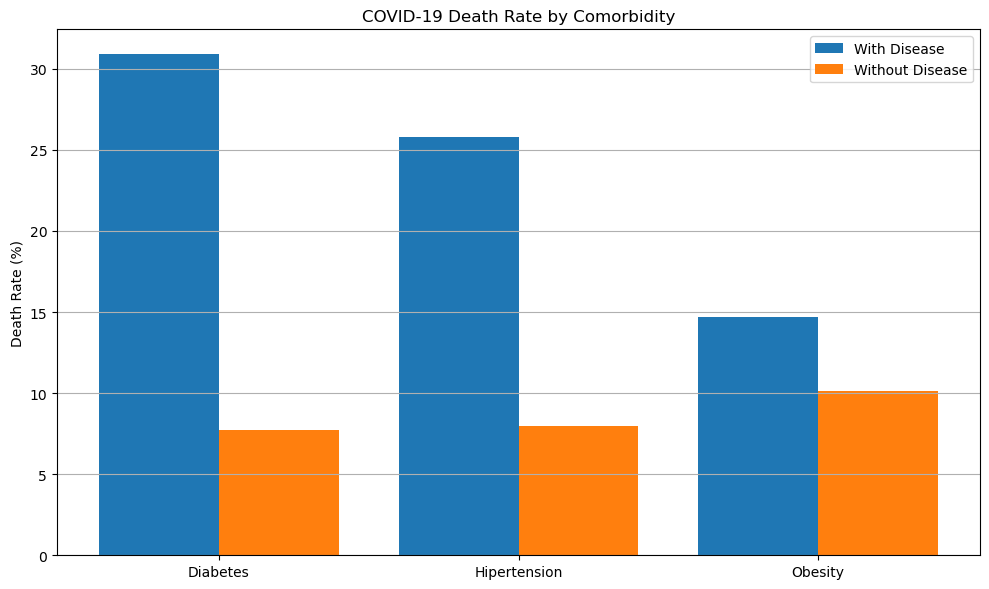

In [34]:
# x축에 표시할 질병 이름 리스트 (첫 글자만 대문자)
labels = [d.capitalize() for d in disease_list]

# 각각 질병에 대해 with/without 사망률 꺼내기
with_rates = [results[d]['with'] for d in disease_list]
without_rates = [results[d]['without'] for d in disease_list]

# x 위치 지정
x = range(len(disease_list))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x, with_rates, width=0.4, label='With Disease', align='center')
plt.bar([i + 0.4 for i in x], without_rates, width=0.4, label='Without Disease', align='center')

# x축 눈금 위치 + 라벨
plt.xticks([i + 0.2 for i in x], labels)

# 그래프 제목과 라벨
plt.ylabel("Death Rate (%)")
plt.title("COVID-19 Death Rate by Comorbidity")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 불러오기
df = pd.read_csv("Covid Data.csv")

# died 컬럼 생성
df['died'] = df['DATE_DIED'] != '9999-99-99'

# 코로나 확진자만 필터링
confirmed = df[df['CLASIFFICATION_FINAL'] == 1]

# 사용할 컬럼 선택 (원하면 더 추가 가능)
features = ['AGE', 'SEX', 'DIABETES', 'HIPERTENSION', 'OBESITY', 'PNEUMONIA']
X = confirmed[features]
y = confirmed['died'].astype(int)  # True/False → 1/0으로 변환

# 결측치 제거 (있다면)
X = X.dropna()
y = y.loc[X.index]

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1530
           1       0.63      0.42      0.51       191

    accuracy                           0.91      1721
   macro avg       0.78      0.70      0.73      1721
weighted avg       0.90      0.91      0.90      1721

Confusion Matrix:
 [[1483   47]
 [ 110   81]]
